In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [201]:
df_train = pd.read_csv('data_train.csv', sep=',',header=None)
df_dev = pd.read_csv('data_dev.csv', sep=',',header=None)
df_test = pd.read_csv('data_test.csv', sep=',',header=None)

In [202]:
df_train

,0,1,2,3
0,38,66,0,1
1,38,66,11,1
2,38,60,1,1
3,38,67,5,1
4,39,66,0,2
...,...,...,...,...
240,75,62,1,1
241,76,67,0,1
242,77,65,3,1
243,78,65,1,2


In [8]:
#a.i) 
count = df_train[3].value_counts()
count
#173 patients in Class 1
#72 patients in Class 2

1    173
2     72
Name: 3, dtype: int64

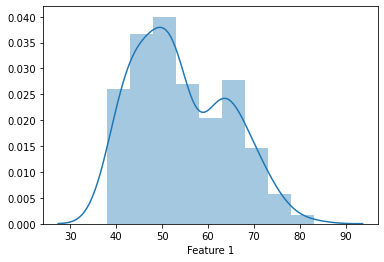

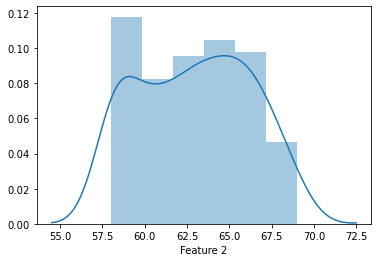

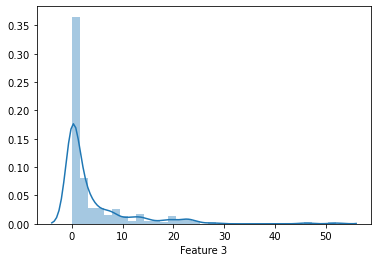

<Figure size 432x288 with 0 Axes>

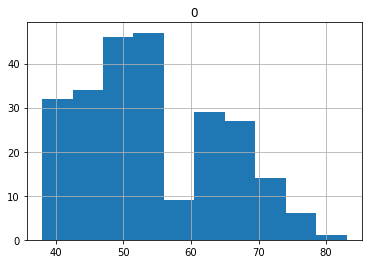

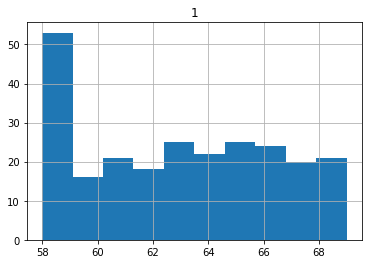

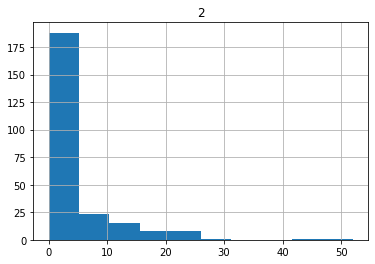

In [15]:
for i in range(0,3):
    sns.distplot(df_train[i], axlabel = "Feature " + str(i+1))
    plt.figure() 
for i in range(0,3):
    df_train.hist(column=i)
#df_train.hist(column=0)

Text(0, 0.5, 'year of operation')

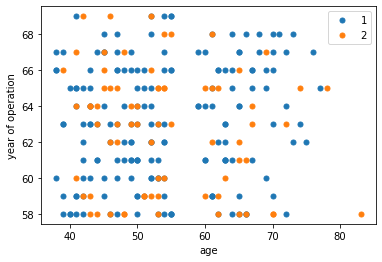

In [203]:
groups = df_train.groupby(3)
#print(groups)
for name, group in groups:
   plt.plot(group[0], group[1], marker='o', linestyle='', markersize=5, label=name)
plt.legend()
plt.xlabel("age")
plt.ylabel("year of operation")


Text(0, 0.5, 'number of positive ancillary nodes')

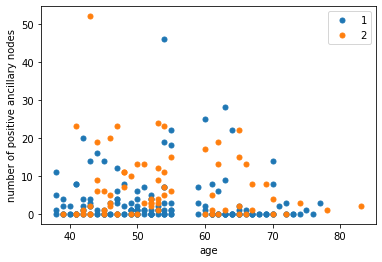

In [204]:
groups = df_train.groupby(3)
#print(groups)
for name, group in groups:
   plt.plot(group[0], group[2], marker='o', linestyle='', markersize=5, label=name)
plt.legend()
plt.xlabel("age")
plt.ylabel("number of positive ancillary nodes")

Text(0, 0.5, 'number of positive ancillary nodes')

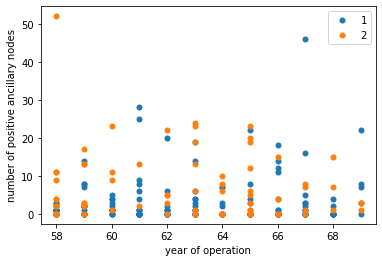

In [205]:
groups = df_train.groupby(3)
#print(groups)
for name, group in groups:
   plt.plot(group[1], group[2], marker='o', linestyle='', markersize=5, label=name)
plt.legend()
plt.xlabel("year of operation")
plt.ylabel("number of positive ancillary nodes")

In [238]:
#Required modules
import numpy as np
from scipy.stats import mode
 
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
 
#Function to calculate KNN
def KNN_prediction(x_train, y_train , x_test, k):
    
    get_labels = []
     
    #Loop through each row of test dataset
    for row in x_test: 
         
        #Array to store distances
        arr_dist = []
         
        #For each row of test data loop through each row of training data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , row) 
            #Calculating the distance
            arr_dist.append(distances) 
        
        arr_dist = np.array(arr_dist) 
         
        #Sort the array and preserve the index
        #Then Keep the first K datapoints
        dist = np.argsort(arr_dist)[:k] 
         
        #Labels of the K datapoints
        labels = y_train[dist]
         
        #KNN Majority Votes
        lab = mode(labels) 
        lab = lab.mode[0]
        get_labels.append(lab)
 
    return get_labels

In [266]:
X_train = df_train.iloc[:,:3].values
Y_train =  df_train.iloc[:,3].values
X_dev = df_dev.iloc[:,:3].values
Y_dev =  df_dev.iloc[:,3].values

#Applying our function 
y_pred = KNN_prediction(X_train,Y_train,X_dev , 31)

#print(X_train)
#print(Y_train)
print(Y_dev)
print(y_pred)


[1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]


In [303]:
results = []

class1 = (Y_dev == 1).sum()
class2 = (Y_dev == 2).sum()

predictions1 = KNN_prediction(X_train,Y_train,X_dev,1)

class1_true_index = np.where(Y_dev==1)[0]
#print("vvv",class1_true_index)

class2_true_index = np.where(Y_dev==2)[0]
#print("vvv",class2_true_index)


for k in range(1,14,2):
  
    predictions = KNN_prediction(X_train,Y_train,X_dev,k)

    acc = np.sum(predictions==Y_dev)/len(Y_dev)
    
    #for elements in class1 in ydev, how many are correctly classified?
    counter_correct_1 = 0
  
    for elem in class1_true_index:
        #print(elem)
        if predictions[elem]==Y_dev[elem]:
            counter_correct_1+= 1 
    

    counter_correct_2 = 0
    for elem in class2_true_index:
    #print(elem)
        if predictions[elem]==Y_dev[elem]:
            counter_correct_2+= 1 
    
    #print(counter_correct_1)
    #print(counter_correct_2)
    
    bcc = 0.5 *  counter_correct_1/class1
    bcc += 0.5 * counter_correct_2/class2
    
    #print("ayyyy",bcc)
    
    results.append([k,acc,bcc])

print(results)
    
    

[[1, 0.8666666666666667, 0.48148148148148145], [3, 0.8666666666666667, 0.48148148148148145], [5, 0.9, 0.6481481481481481], [7, 0.8666666666666667, 0.48148148148148145], [9, 0.8666666666666667, 0.48148148148148145], [11, 0.8666666666666667, 0.48148148148148145], [13, 0.8666666666666667, 0.48148148148148145]]


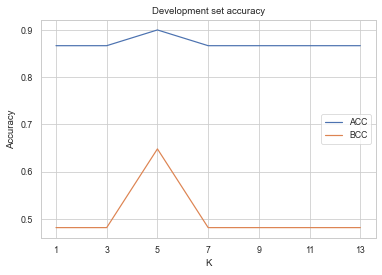

In [304]:
# transform to a numpy array
results_np = np.asarray(results)
sns.set("paper","whitegrid")

plt.plot(results_np[:,0],results_np[:,1],label="ACC")
plt.plot(results_np[:,0],results_np[:,2],label="BCC")

plt.xticks(results_np[:,0])
plt.legend()

plt.title('Development set accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.show()

In [307]:
X_test = df_test.iloc[:,:3].values
Y_test =  df_test.iloc[:,3].values
#print(X_test)
#print(Y_test)

results = []

class1 = (Y_test == 1).sum()
class2 = (Y_test == 2).sum()


class1_true_index = np.where(Y_test==1)[0]
#print("vvv",class1_true_index)

class2_true_index = np.where(Y_test==2)[0]
#print("vvv",class2_true_index)


for k in range(5,6):
  
    predictions = KNN_prediction(X_train,Y_train,X_test,k)

    acc = np.sum(predictions==Y_test)/len(Y_test)
    
    #for elements in class1 in ytest, how many are correctly classified?
    counter_correct_1 = 0
  
    for elem in class1_true_index:
        #print(elem)
        if predictions[elem]==Y_test[elem]:
            counter_correct_1+= 1 
    

    counter_correct_2 = 0
    for elem in class2_true_index:
    #print(elem)
        if predictions[elem]==Y_test[elem]:
            counter_correct_2+= 1 
    
    #print(counter_correct_1)
    #print(counter_correct_2)
    
    bcc = 0.5 *  counter_correct_1/class1
    bcc += 0.5 * counter_correct_2/class2
    
    #print("ayyyy",bcc)
    
    results.append([k,acc,bcc])

print(results)
    

[[5, 0.8387096774193549, 0.6466666666666666]]


In [310]:
#####Manhattan Distance########
#Required modules
import numpy as np
from scipy.stats import mode
 
#Manhattan Distance
def manhattan(p1,p2):
    #dist = np.sqrt(np.sum((p1-p2)**2))
    #return dist
    return sum(abs(p1 - p2))

#Function to calculate KNN
def KNN_prediction_manhattan(x_train, y_train , x_test, k):
    
    get_labels = []
     
    #Loop through each row of test dataset
    for row in x_test: 
         
        #Array to store distances
        arr_dist = []
         
        #For each row of test data loop through each row of training data
        for j in range(len(x_train)): 
            distances = manhattan(np.array(x_train[j,:]) , row) 
            #Calculating the distance
            arr_dist.append(distances) 
        
        arr_dist = np.array(arr_dist) 
         
        #Sort the array and preserve the index
        #Then Keep the first K datapoints
        dist = np.argsort(arr_dist)[:k] 
         
        #Labels of the K datapoints
        labels = y_train[dist]
         
        #KNN Majority Votes
        lab = mode(labels) 
        lab = lab.mode[0]
        get_labels.append(lab)
 
    return get_labels





In [311]:
results = []

class1 = (Y_dev == 1).sum()
class2 = (Y_dev == 2).sum()

predictions1 = KNN_prediction(X_train,Y_train,X_dev,1)

class1_true_index = np.where(Y_dev==1)[0]
#print("vvv",class1_true_index)

class2_true_index = np.where(Y_dev==2)[0]
#print("vvv",class2_true_index)


for k in range(1,14,2):
  
    predictions = KNN_prediction_manhattan(X_train,Y_train,X_dev,k)

    acc = np.sum(predictions==Y_dev)/len(Y_dev)
    
    #for elements in class1 in ydev, how many are correctly classified?
    counter_correct_1 = 0
  
    for elem in class1_true_index:
        #print(elem)
        if predictions[elem]==Y_dev[elem]:
            counter_correct_1+= 1 
    

    counter_correct_2 = 0
    for elem in class2_true_index:
    #print(elem)
        if predictions[elem]==Y_dev[elem]:
            counter_correct_2+= 1 
    
    #print(counter_correct_1)
    #print(counter_correct_2)
    
    bcc = 0.5 *  counter_correct_1/class1
    bcc += 0.5 * counter_correct_2/class2
    
    #print("ayyyy",bcc)
    
    results.append([k,acc,bcc])

print(results)
    

[[1, 0.8666666666666667, 0.48148148148148145], [3, 0.8666666666666667, 0.48148148148148145], [5, 0.8333333333333334, 0.46296296296296297], [7, 0.8666666666666667, 0.48148148148148145], [9, 0.8666666666666667, 0.48148148148148145], [11, 0.8666666666666667, 0.48148148148148145], [13, 0.8666666666666667, 0.48148148148148145]]


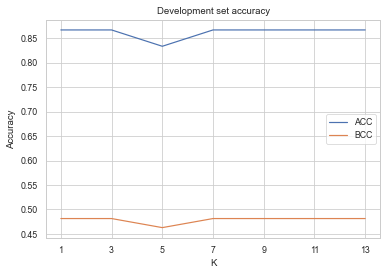

In [312]:
# transform to a numpy array
results_np = np.asarray(results)
sns.set("paper","whitegrid")

plt.plot(results_np[:,0],results_np[:,1],label="ACC")
plt.plot(results_np[:,0],results_np[:,2],label="BCC")

plt.xticks(results_np[:,0])
plt.legend()

plt.title('Development set accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.show()